In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable

In [2]:
import seaborn as sns
sns.set()

## Movement integration

In [3]:
class Body:
    def __init__(self, h_0, m, v_0=0):
        '''
        h_0 -- hight in [m]
        m -- mass in [kg]
        v_0 -- speed along vertical axis in [m/s]
        '''
        self.y = h_0
        self.v_y = v_0
        self.m = m

def body_factory():
    return Body(5000, 3)

def acceleration(y, v_y, m):
    g = 9.81
    R_earth = 6_370e3 # [m]
    # k = 20**(-4) # damping coefficient [kg/m] (probably should be 2*10^-4)
    k = 2*10**(-4) # damping coefficient [kg/m] (probably should be 2*10^-4)
    grav_f = -g*m/(1+y/R_earth)**2
    damp_f = -k*v_y**2*np.sign(v_y)
    return (grav_f + damp_f)/m



In [4]:
def stop_criteria(body, step):
    return body.y <= 0

def drop_the_body(body, accel_function: Callable, step_integration: Callable, dt=0.1):
    metrics = {
        "y": [],
        "v_y": [],
        "t": [],
        "a": [],
    }
    t = 0
    max_steps = 100_000
    step = 0
    while not stop_criteria(body, step):
        a = accel_function(body.y, body.v_y, body.m)
        metrics["y"].append(body.y)
        metrics["v_y"].append(body.v_y)
        metrics["t"].append(t)
        metrics["a"].append(a)
        
        step_integration(body, dt, accel_function)        
        
        t += dt
        step+=1
        if (step > max_steps):
            print("Max steps reached")
            break
    
    return metrics

def euler_step_integration(body: Body, dt, accel_function):
    a = accel_function(body.y, body.v_y, body.m)
    body.y += body.v_y*dt
    body.v_y += a*dt

In [5]:
euler_metrics = drop_the_body(body_factory(), acceleration, euler_step_integration)

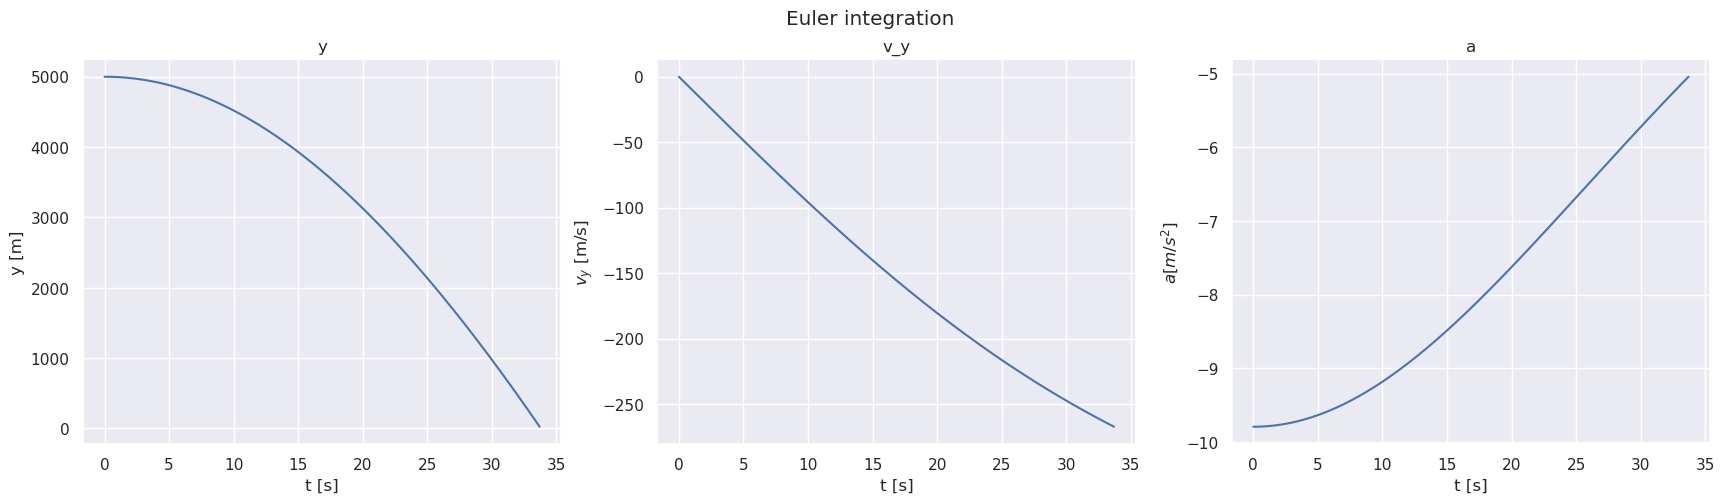

In [6]:
def plot_metrics(metrics):
    y_labels = ["y", "v_y", "a"]
    y_legend_labels = ["y [m]", "$v_y$ [m/s]", "$a [m/s^2]$"]
    
    plt.figure(figsize=(7*len(y_labels), 5))
    
    for i, label in enumerate(y_labels):
        plt.subplot(1, len(y_labels), i+1)
        plt.plot(metrics['t'], metrics[label])
        plt.ylabel(y_legend_labels[i])
        plt.xlabel("t [s]")
        plt.title(label)

plot_metrics(euler_metrics)
plt.suptitle("Euler integration");

## Harmonic Oscillator

In [7]:

def pend_accel(y, v_y, m):
    k = 1
    return -k*y/m

Analytic solution (for m=k=1) is
$$y = y_0 \cdot \cos(t) $$

In [8]:

def stop_criteria(body, step):
    return step>500


metrics_pend = drop_the_body(Body(1, 1, 0), pend_accel, euler_step_integration, dt=0.1)

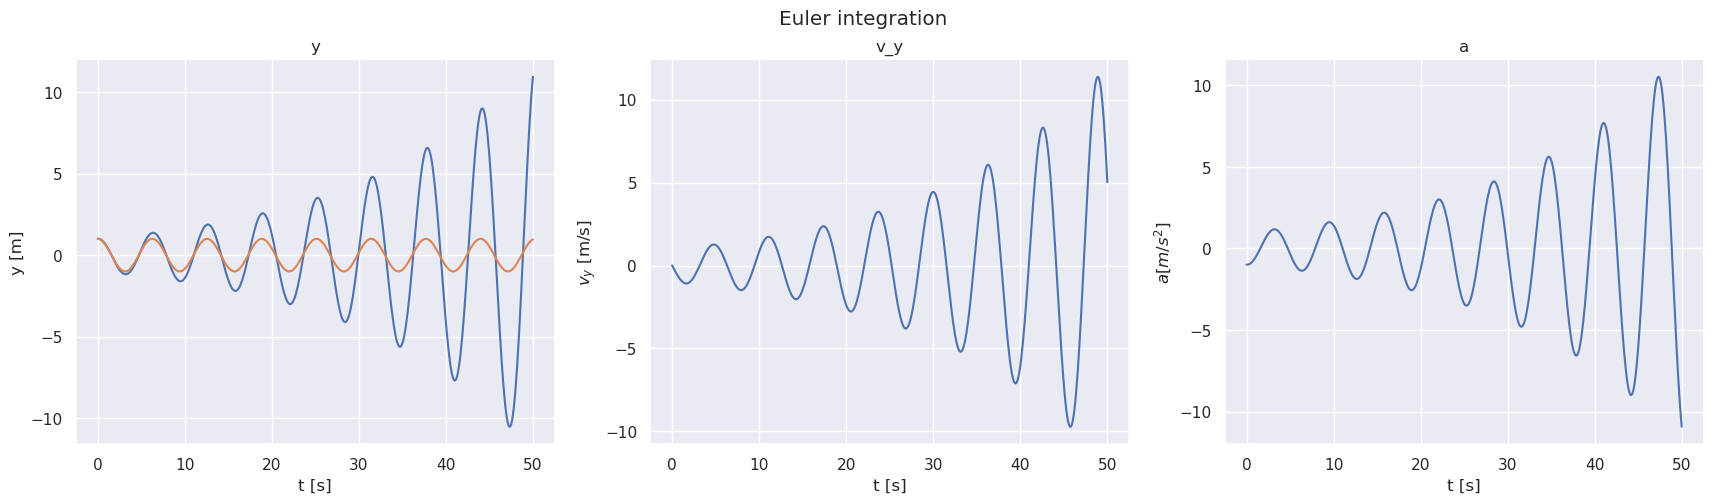

In [9]:
def plot_metrics(metrics, new_figure=True):
    y_labels = ["y", "v_y", "a"]
    y_legend_labels = ["y [m]", "$v_y$ [m/s]", "$a [m/s^2]$"]
    
    if new_figure:
        plt.figure(figsize=(7*len(y_labels), 5))
    
    for i, label in enumerate(y_labels):
        plt.subplot(1, len(y_labels), i+1)
        plt.plot(metrics['t'], metrics[label])
        plt.ylabel(y_legend_labels[i])
        plt.xlabel("t [s]")
        plt.title(label)

plot_metrics(metrics_pend)
plt.subplot(1, 3, 1)
x = np.linspace(0, 50, 300)
y = np.cos(x)
plt.plot(x, y)
plt.suptitle("Euler integration");

for smaller dt

In [10]:
def stop_criteria(body, step):
    return step>10000


metrics_pend = drop_the_body(Body(1, 1, 0), pend_accel, euler_step_integration, dt=0.01)

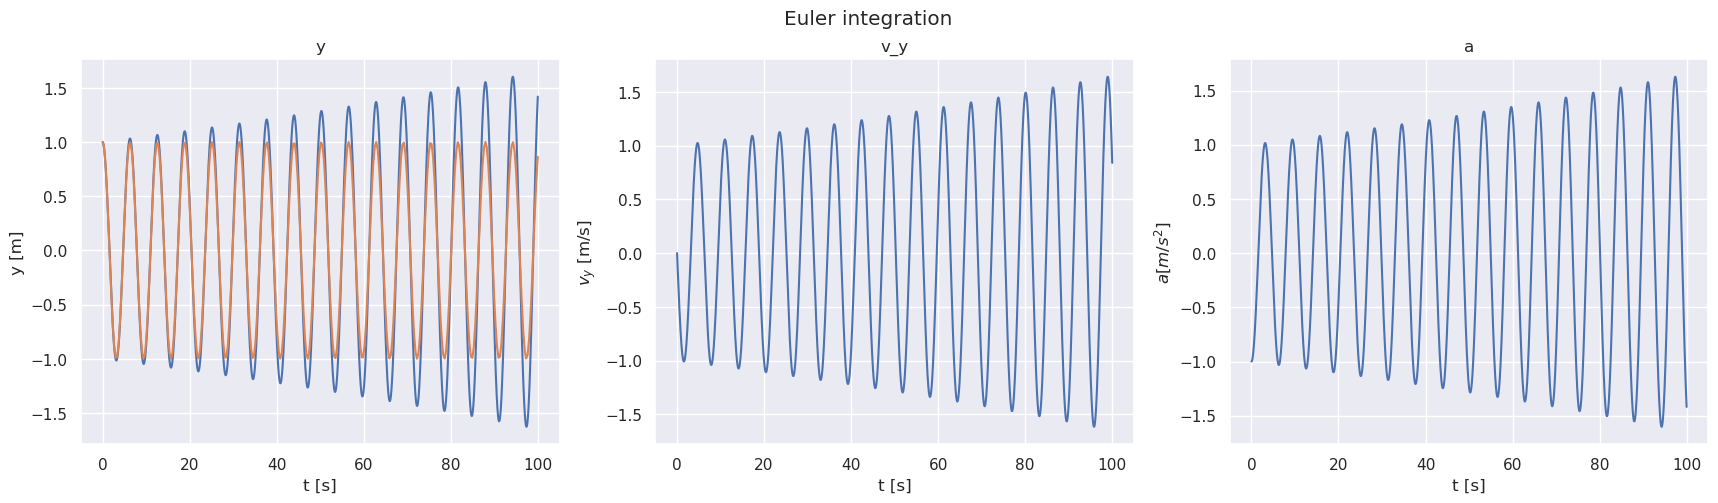

In [11]:
plot_metrics(metrics_pend)
plt.subplot(1, 3, 1)
x = np.linspace(0, 100, 300)
y = np.cos(x)
plt.plot(x, y)
plt.suptitle("Euler integration");

As clearly seen from plots Euler integration method is not stable for pendulum. At each cycle due to small errors body gains some energy and thus it's energy grows exponentially with time. 

## Appendix
### Other integration methods

In [12]:
def euler_richardson_step_integration(body: Body, dt, accel_function):
    a = accel_function(body.y, body.v_y, body.m)
    v_mid = body.v_y + a*dt/2
    y_mid = body.y + body.v_y*dt/2
    a_mid = accel_function(y_mid, v_mid, body.m)
    body.y += v_mid*dt
    body.v_y += a_mid*dt

In [13]:
def stop_criteria(body, step):
    return step>10000


metrics_pend_e_r = drop_the_body(Body(1, 1, 0), pend_accel, euler_richardson_step_integration, dt=0.01)

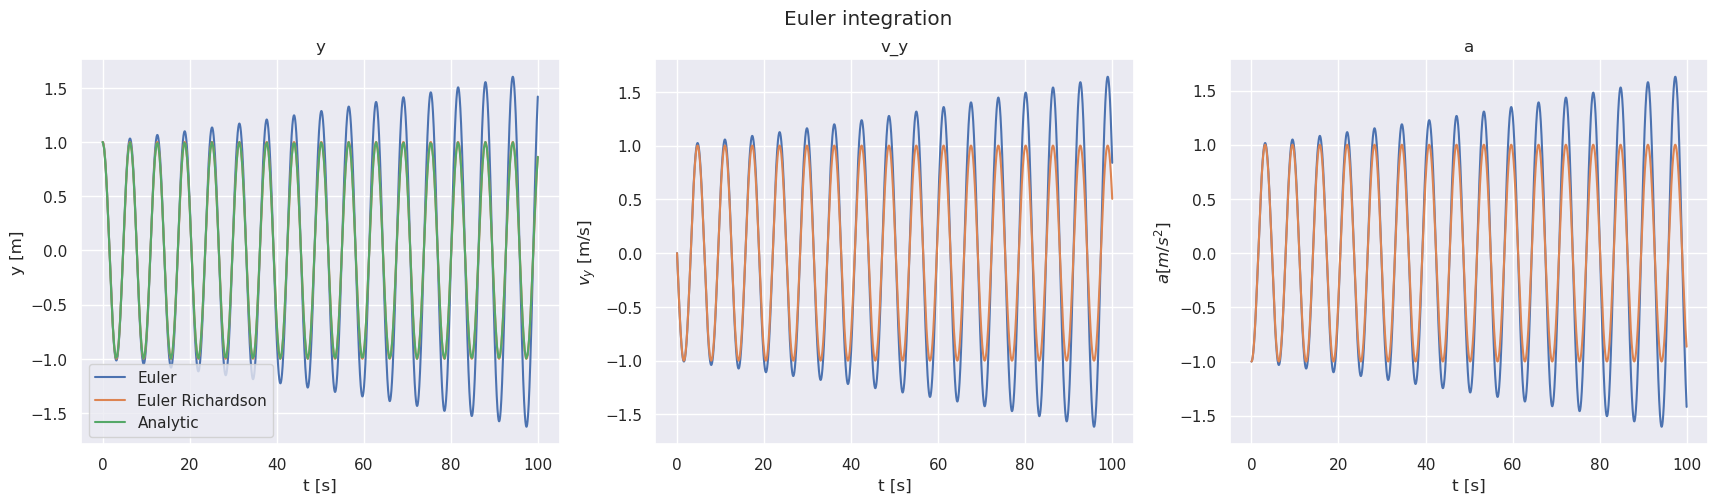

In [14]:
plot_metrics(metrics_pend)
plot_metrics(metrics_pend_e_r, new_figure=False)
plt.subplot(1, 3, 1)
x = np.linspace(0, 100, 300)
y = np.cos(x)
plt.plot(x, y)
plt.legend(["Euler", "Euler Richardson", "Analytic"])
plt.suptitle("Euler integration");

Euler Richardson algorithm has much smaller error. Green and red lines are almost undistinguishable